In [2]:
import math
import csv
import rebound
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import scipy

In [5]:
sim = rebound.Simulation()
sim.G = 39.4769264214 #4*np.pi**2
sim.units = ['AU', 'yr', 'Msun']
choice_date = "2000-01-01 00:00"

sim.add(["Sun","Mercury","Venus","Earth","Mars"], date=choice_date)
sim.add("NAME=1986 TO;", date=choice_date) 
sim.particles[-1].m=6.537671975029727e-17
sim.add(["Jupiter","Saturn","Uranus","Neptune"], date=choice_date)
sim.move_to_com()
sim.save("f_c.bin")

Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Venus Barycenter (299).
Searching NASA Horizons for 'Earth'... Found: Earth-Moon Barycenter (3).
Searching NASA Horizons for 'Mars'... Found: Mars Barycenter (4).
Searching NASA Horizons for 'NAME=1986 TO;'... Found: 3753 Cruithne (1986 TO).
Searching NASA Horizons for 'Jupiter'... 

/usr/local/lib/python3.7/site-packages/rebound/horizons.py:140: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Uranus'... Found: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).


In [12]:
sim = rebound.Simulation.from_file("f_c.bin")
sim.status()

---------------------------------
REBOUND version:     	3.12.1
REBOUND built on:    	Feb 13 2020 23:13:03
Number of particles: 	10
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.007139217582714454 y=-0.0027922251667575402 z=0.0002062269962934102 vx=0.001962956480198697 vy=-0.002706861686818041 vz=-3.441870941584452e-05>
<rebound.Particle object, m=1.6601141530543488e-07 x=-0.14786729754675895 y=-0.4466931829330905 z=-0.023139332716829906 vx=7.733893224983294 vy=-2.5952423907343802 vz=-0.9214984237242468>
<rebound.Particle object, m=2.4478382877847715e-06 x=-0.7257694344866793 y=-0.025296026222473785 z=0.04137806837311803 vx=0.18953079631302006 vy=-7.419525089267694 vz=-0.11222990849461707>
<rebound.Particle object, m=3.040432648022642e-06 x=-0.17568966657354063 y=0.9659714335081361 z=0.0002050751468294029 vx=-6.291298371210122 vy=-1.1033051257622128 vz=-2.5606

In [13]:
Starttime = 0
Noutputs = 10000
year = 1000
times = np.linspace(0.,year, Noutputs)
x = np.zeros((5,Noutputs))
y = np.zeros((5,Noutputs))
z = np.zeros((5,Noutputs))
sim.move_to_com()

ps = sim.particles

In [14]:
for i,time in enumerate(times):
    if i % 10000 ==0:
        print(i)
    sim.integrate(time)
    x[0][i] = ps[3].x
    y[0][i] = ps[3].y
    z[0][i] = ps[3].z
    x[1][i] = ps[5].x
    y[1][i] = ps[5].y
    z[1][i] = ps[5].z
    
    x[2][i] = ps[2].x
    y[2][i] = ps[2].y
    z[2][i] = ps[2].z
    x[3][i] = ps[1].x
    y[3][i] = ps[1].y
    z[3][i] = ps[1].z
    x[4][i] = ps[4].x
    y[4][i] = ps[4].y
    z[4][i] = ps[4].z

0


<IPython.core.display.Javascript object>


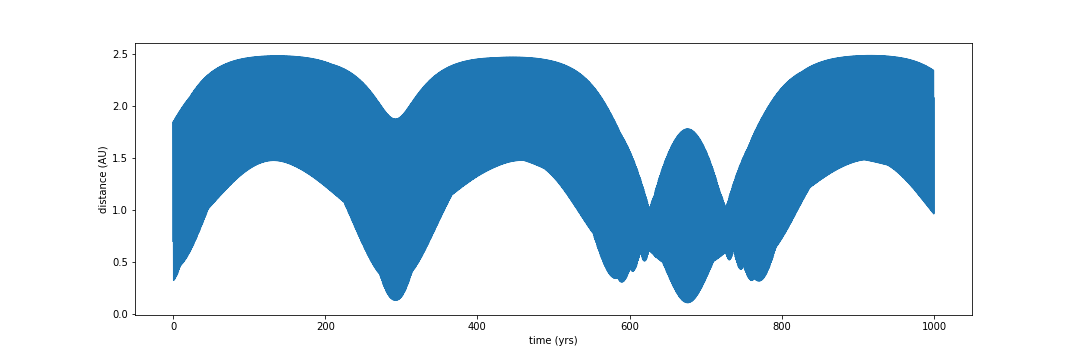

Minimum distance 0.110677 AU at time: 676.567657 years.


In [17]:
%matplotlib notebook
distance = np.sqrt(np.square(x[0] - x[1]) + np.square(y[0] - y[1]) + np.square(z[0] - z[1]))
times = times
closeencountertime = times[np.argmin(distance)]

fig = plt.figure(figsize=(15, 5))
ax = plt.subplot(111)
ax.set_xlabel("time (yrs)")
ax.set_ylabel("distance (AU)")
plt.plot(times, distance,label="Earth");
fig.savefig("cruithne_distance.png")

print("Minimum distance %f AU at time: %f years." % (np.min(distance),closeencountertime))

In [19]:
sim2=rebound.Simulation()
sim2.add("Sun")
sim2.add(m=6.537671975029727e-17, e=0, P=1)
sim2.move_to_com()
sim2.save("error_sim.bin")

Searching NASA Horizons for 'Sun'... Found: Sun (10).
0.0004015107141324439 -8.673617379884035e-19 0.0
0.0004015107141324439 -1.2047027000296075e-17 -1.711177671220809e-20
0.0004015107141324439 -1.8793130555399132e-17 -3.422355342441618e-20
0.0004015107141324439 -1.8398803355022014e-17 -5.1335330136624296e-20
0.0004015107141324439 -1.0938084835156052e-17 -6.844710684883233e-20
0.0004015107141324439 7.62912444557271e-19 -8.555888356104043e-20
0.0004015107141324439 1.2226659142666644e-17 -1.0267066027324852e-19
0.0004015107141324439 1.90680254070384e-17 -1.1978243698545672e-19
0.0004015107141324439 1.870211128844407e-17 -1.3689421369766472e-19
0.0004015107141324439 1.1350960543407013e-17 -1.5400599040987293e-19
0.0004015107141324439 -4.29164128183395e-20 -1.7111776712208078e-19
0.0004015107141324439 -1.0962531097074088e-17 -1.882295438342888e-19
0.0004015107141324439 -1.7075600966342467e-17 -2.0534132054649704e-19
0.0004015107141324439 -1.592179794557267e-17 -2.224530972587048e-19
0.0004

In [35]:
sim2 = rebound.Simulation("error_sim.bin")
sim2.t = 0
sim2.move_to_com()
np.zeros
Noutputs = 100
years = 10000
orbits = np.zeros((3,Noutputs))
times = np.linspace(0.,years, Noutputs)
for i,time in enumerate(times):
    sim2.integrate(time)
    #print(sim.calculate_orbits()[0])
    #print(sim.particles[0].x,sim2.particles[0].y,sim2.particles[0].z)
    orbits[0][i] = sim2.particles[1].orbit.P
    orbits[1][i] = sim2.particles[1].orbit.e
    orbits[2][i] = sim2.particles[1].orbit.a

<IPython.core.display.Javascript object>


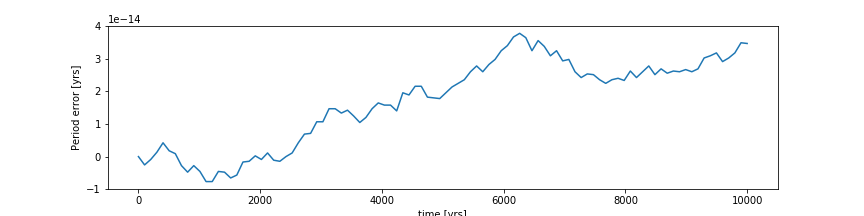

In [36]:
%matplotlib notebook
fig = plt.figure(figsize=(12,3))
ax = plt.subplot(111)
ax.set_xlabel("time [yrs]")
ax.set_ylabel("Period error [yrs]")
fig.savefig("Perr.png")

plt.plot(times, (orbits[0]-1.0));

<IPython.core.display.Javascript object>


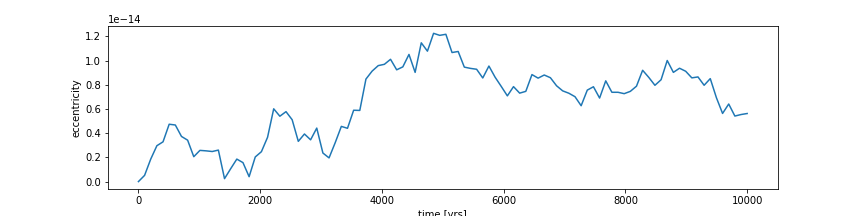

In [37]:
%matplotlib notebook
fig = plt.figure(figsize=(12,3))
ax = plt.subplot(111)
ax.set_xlabel("time [yrs]")
ax.set_ylabel("eccentricity")
fig.savefig("eccErr.png")

plt.plot(times, orbits[1]);

<IPython.core.display.Javascript object>


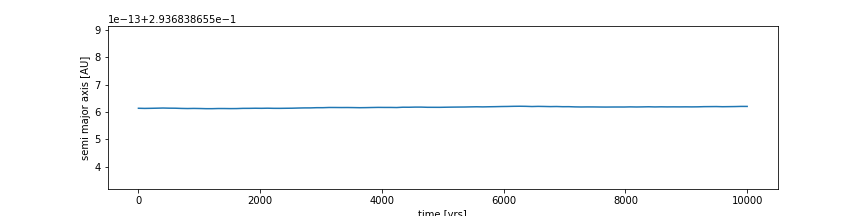

In [38]:
%matplotlib notebook
fig = plt.figure(figsize=(12,3))
ax = plt.subplot(111)
ax.set_xlabel("time [yrs]")
ax.set_ylabel("semi major axis [AU]")

plt.plot(times, orbits[2]);